Based on the code from [https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_atlas.html](https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_atlas.html)



In [5]:
import random

import matplotlib.pyplot as plt

import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.drawing.nx_agraph import graphviz_layout

import grinpy as gp

from pycliques.retractions import has_induced

def atlas6(criterion):
    """Return the atlas of all connected graphs of 6 nodes or less
    satisfying criterion
    """
    Atlas = graph_atlas_g()[1:208]  # 208
    U = nx.Graph() 
    for G in Atlas:
        if criterion(G):
            U = nx.disjoint_union(U, G)
    return U

def the_picture(criterion):
    G = atlas6(criterion)
    plt.figure(1, figsize=(4, 4))
    # layout graphs with positions using graphviz neato
    pos = graphviz_layout(G, prog="neato")
    # color nodes the same in each connected subgraph
    C = (G.subgraph(c) for c in nx.connected_components(G))
    for g in C:
        c = [random.random()] * nx.number_of_nodes(g)  # random color...
        nx.draw(g,
                pos,
                node_size=40,
                node_color=c,
                vmin=0.0,
                vmax=1.0,
                with_labels=False)
    plt.show()

## Trees



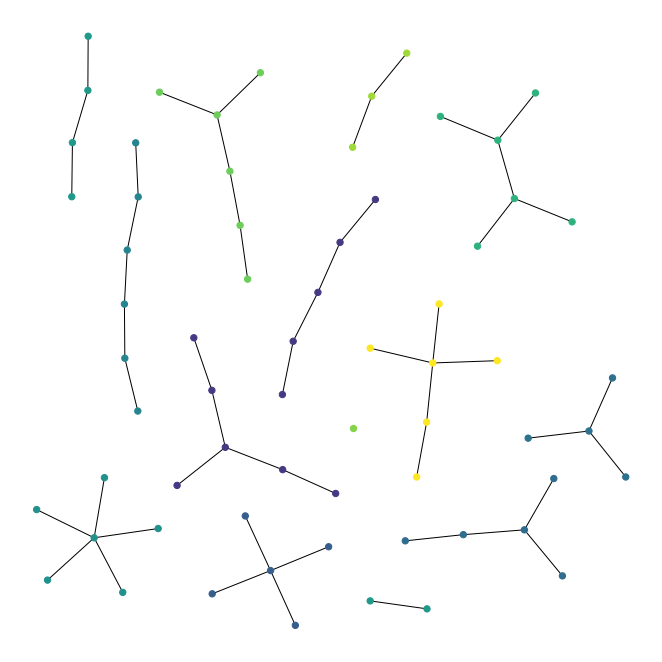

In [11]:
plt.figure(figsize=(9,9))
the_picture(nx.is_tree)

## Bipartite



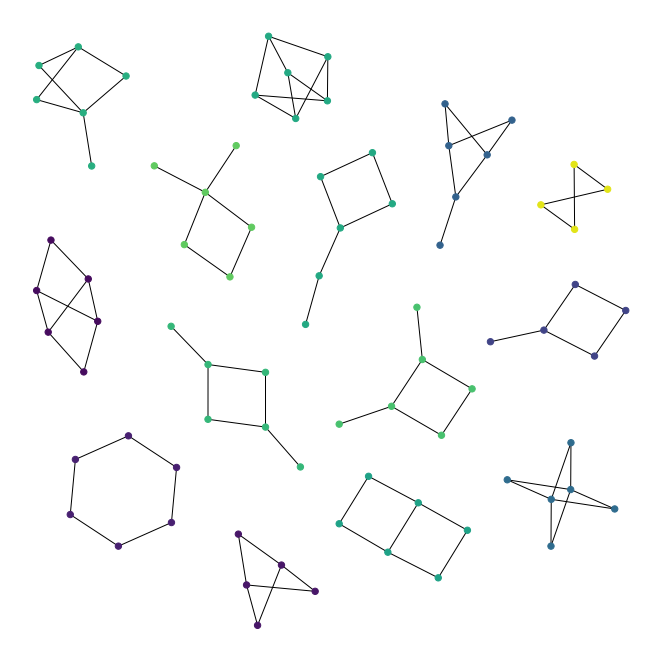

In [13]:
def bipartite_not_tree(graph):
    return nx.is_connected(graph) and nx.is_bipartite(graph) and not nx.is_tree(graph)

plt.figure(figsize=(9,9))
the_picture(bipartite_not_tree)

## Triangle Free



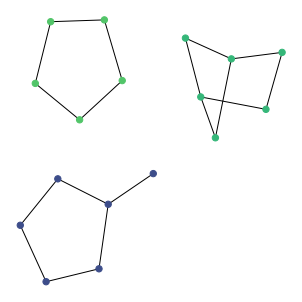

In [6]:
def triangle_free_not_bipartite(graph):
    return nx.is_connected(graph) and gp.is_triangle_free(graph) and not nx.is_bipartite(graph) 

the_picture(triangle_free_not_bipartite)

## Diamond Free



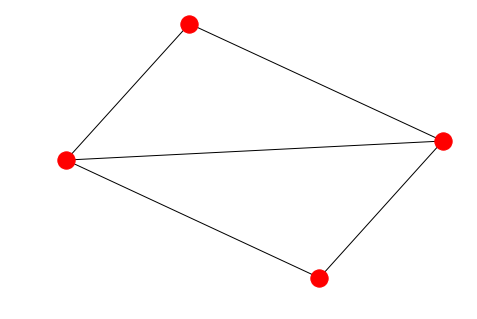

In [6]:
nx.draw(nx.diamond_graph())

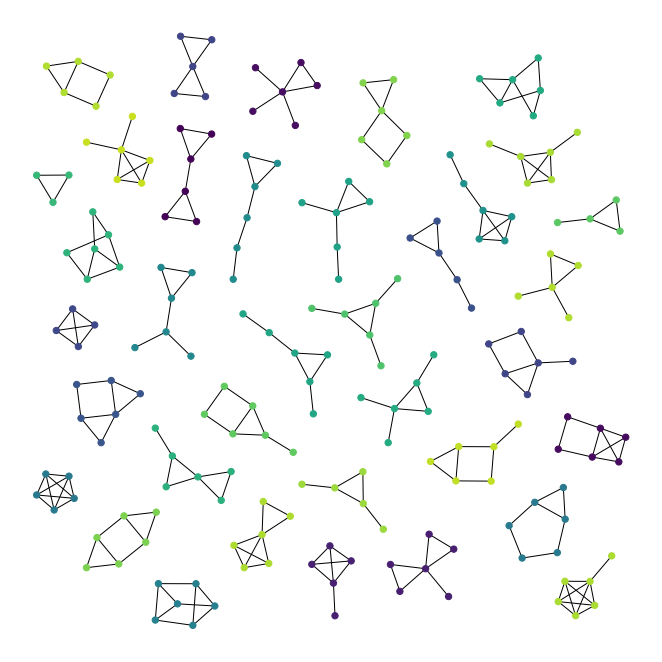

In [14]:
from pycliques.retractions import has_induced

def is_diamond_free(graph):
    return not has_induced(graph, nx.diamond_graph())

def diamond_free_not_triangle_free(graph):
    return nx.is_connected(graph) and is_diamond_free(graph) and not gp.is_triangle_free(graph) 

plt.figure(figsize=(9,9))
the_picture(diamond_free_not_triangle_free)

## Interval



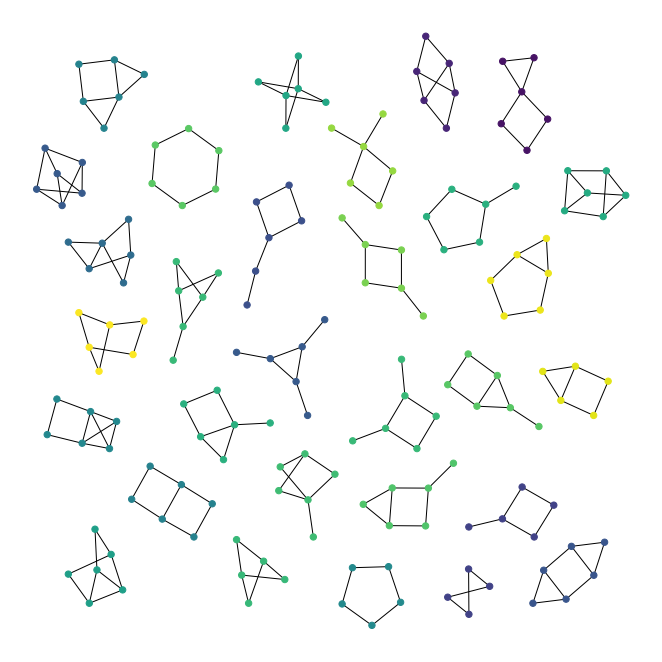

In [15]:
def is_interval(graph):
    return nx.is_chordal(graph) and nx.is_at_free(graph)

def diamond_free_not_interval(graph):
    return nx.is_connected(graph) and is_diamond_free(graph) and not is_interval(graph)

plt.figure(figsize=(9,9))
the_picture(diamond_free_not_interval)

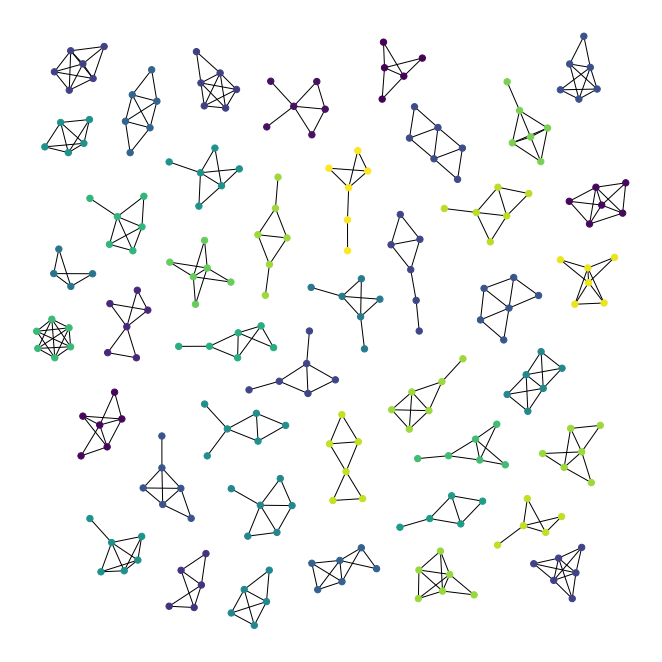

In [16]:
def interval_not_diamond_free(graph):
    return nx.is_connected(graph) and not is_diamond_free(graph) and is_interval(graph)

plt.figure(figsize=(9,9))
the_picture(interval_not_diamond_free)